## Задача 12
Предсказать сорт винограда из которого сделано вино, используя результаты химических анализов, c помощью KNN - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k.

### Решение

In [109]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, neighbors, preprocessing
from matplotlib import pyplot as plt

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Основные константы:
    

In [110]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [ 'Class',
                 'Alcohol',
                 'Malic acid',
                 'Ash',
                 'Alcalinity of ash',
                 'Magnesium',
                 'Total phenols',
                 'Flavanoids',
                 'Nonflavanoid phenols',
                 'Proanthocyanins',
                 'Color intensity',
                 'Hue',
                 'OD280/OD315 of diluted wines',
                 'Proline']
use_metrics = ['euclidean', 'manhattan', 'chebyshev']

Загрузим данные:

In [48]:
# Считываем все данные
data = pd.read_csv(url, header=None, names=column_names)
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Можно заметить, что данные имеют большой численный разброс. Поэтому ортонормирую их и разделю на обучающую и тестовую выборки:

In [39]:
y = data[ column_names[0] ].values
X = data[ column_names[1:]].values

# Нормирование
X = preprocessing.scale(X,axis=0)
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.ravel()
y_test = y_test.ravel()

Выполним расчёт точности предсказания от двух параметров: 
    - выбранная метрика ('euclidean', 'manhattan', 'chebyshev')
    - количество соседий

In [56]:
max_neighbors_num = X_train.shape[0]
accuracy = np.zeros((3, max_neighbors_num))

for i in range(3):
    for neighbors_num in range(1, max_neighbors_num):
        knn = neighbors.KNeighborsClassifier(n_neighbors = neighbors_num, 
                                             metric = use_metrics[i])
        
        knn.fit(X_train, y_train)
        prediction = knn.predict(X_test)
        accuracy[i][neighbors_num] = metrics.accuracy_score(y_test, prediction)

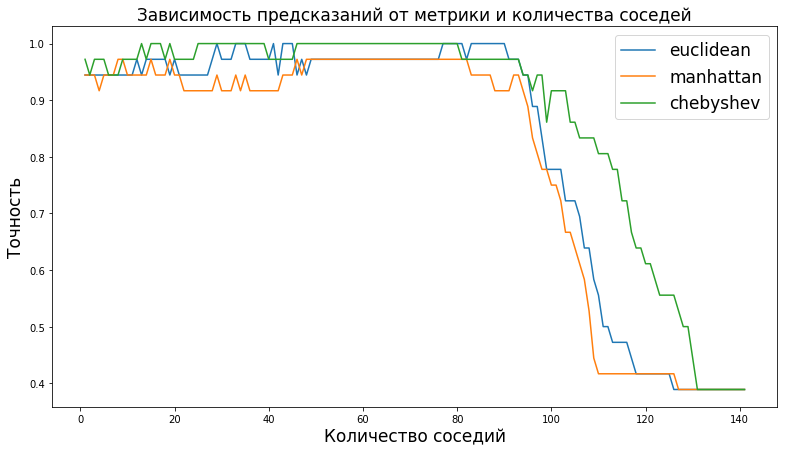

In [73]:
plt.figure(figsize=(13, 7))
for i in range(0, 3):
    plt.plot(np.arange(1, max_neighbors_num), accuracy[i][1:], label = use_metrics[i])
    

plt.title('Зависимость предсказаний от метрики и количества соседей', fontsize=17)
plt.xlabel('Количество соседий', fontsize=17)
plt.ylabel('Точность', fontsize=17)
plt.legend(fontsize=17)
plt.savefig(fname='Error_from_Neighborscnt_withSTD.png',format='png')
plt.show()

### Вывод:
Можно заметить, что, при выборе количества соседий болшего, чем половина выборки, точность предсказаний падает. От метрики же не большая зависимость, но можно подметить, что метрика чебышева ведёт себя более стабильно

## Доп. Задание (для 694 группы)

На синтетической выборке или выборке из пробных задач построить график зависимости ошибки от числа добавленных признаков. Сделать на обучении и контроле с указанием дисперсии. Дисперсию считать по ошибкам на дополнительных разбиениях выборки

In [85]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
%matplotlib inline

### Решение

* Решим задачу, используя данные из предыдущей задачи:

In [99]:
# n - размер набора
# m - количество признаков
n, m = X_train.shape

# Значения функции потерь от кол-ва параметров
loss_test = np.zeros(m + 1)
loss_train = np.zeros(m + 1)

# Значение дисперсии от количества параметров
var_test = np.zeros(m + 1)
var_train = np.zeros(m + 1)
n, m


(142, 13)

* Произведём подсчёт функции потерь и дисперсии от разного количества признаков

In [101]:
for i in range(1, m + 1):
    cur_X_train = X_train.T[:i].T
    cur_X_test = X_test.T[:i].T
    
    lr = LinearRegression()
    lr.fit(cur_X_train, y_train)
    
    error_train = np.absolute(lr.predict(cur_X_train) - y_train)
    error_test = np.absolute(lr.predict(cur_X_test) - y_test)
    
    loss_train[i] = (error_train ** 2).sum() / (error_train.shape[0])
    loss_test[i] = (error_test ** 2).sum() / (error_test.shape[0])
    
    var_train[i] = (error_train ** 2).sum() / error_train.shape[0] - \
        ((error_train / error_train.shape[0]) ** 2).sum()
    var_test[i] = (error_test ** 2).sum() / error_test.shape[0] - \
        ((error_test / error_test.shape[0]) ** 2).sum()

 * И изобразим полученные веиличины на графиках:

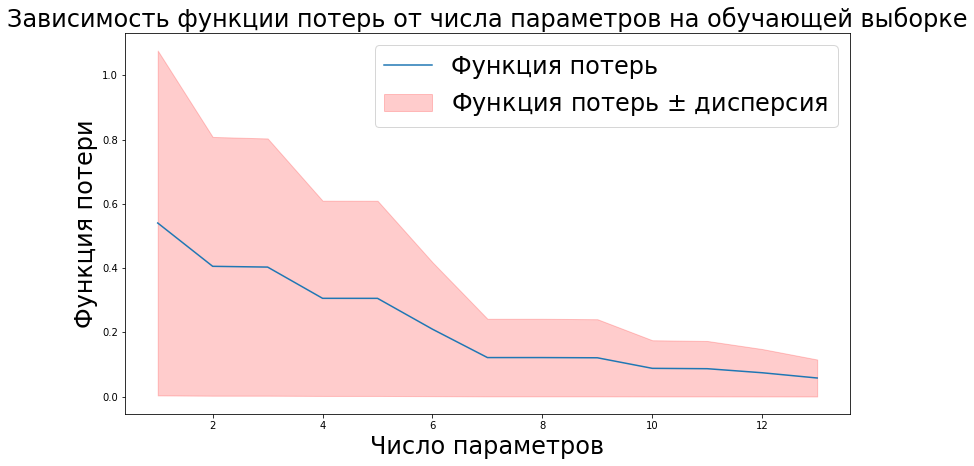

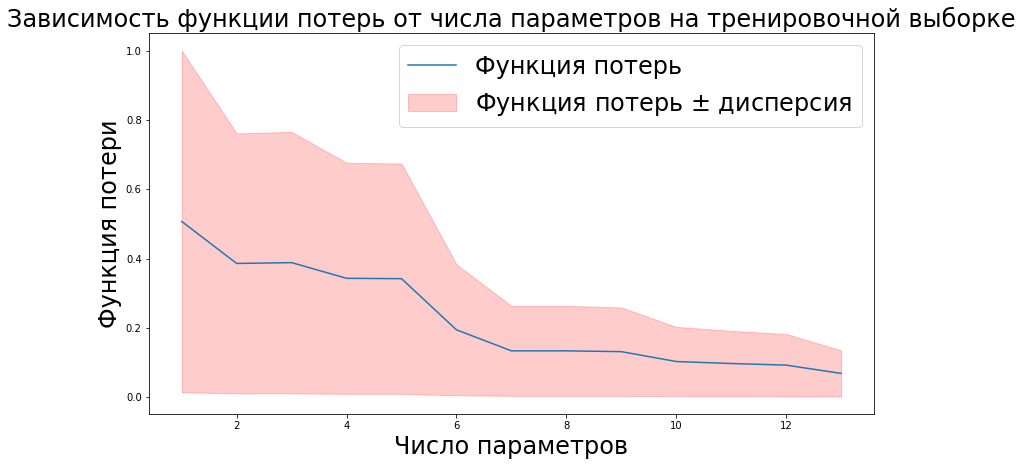

In [107]:
part_names = ['обучающей', 'тренировочной']
loss_functions = [loss_train, loss_test]
var_functions = [var_train, var_test]

for i in range(2):
    plt.figure(figsize=(13, 7))
    plt.title("Зависимость функции потерь от числа параметров на {} выборке".format(part_names[i]), 
          fontsize=24)
    
    plt.plot(np.arange(1, m + 1), loss_functions[i][1:], label="Функция потерь")
    
    plt.fill_between(np.arange(1, m + 1), loss_functions[i][1:] - var_functions[i][1:], 
                 loss_functions[i][1:] + var_functions[i][1:], color='red', alpha = 0.2, 
                 label='Функция потерь $\\pm$ дисперсия')
    plt.legend(fontsize=24)
    plt.xlabel("Число параметров", fontsize=24)
    plt.ylabel("Функция потери", fontsize=24)
    plt.show()

### Вывод
Можно заметить, что величина функции потерь и дисперсия убывают при росте числа признаков.